In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## made a data frame

In [3]:
df = pd.read_csv('50_Startups.csv')

## chacking Null value 

In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## information about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Describe about data

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## viewalization of data 

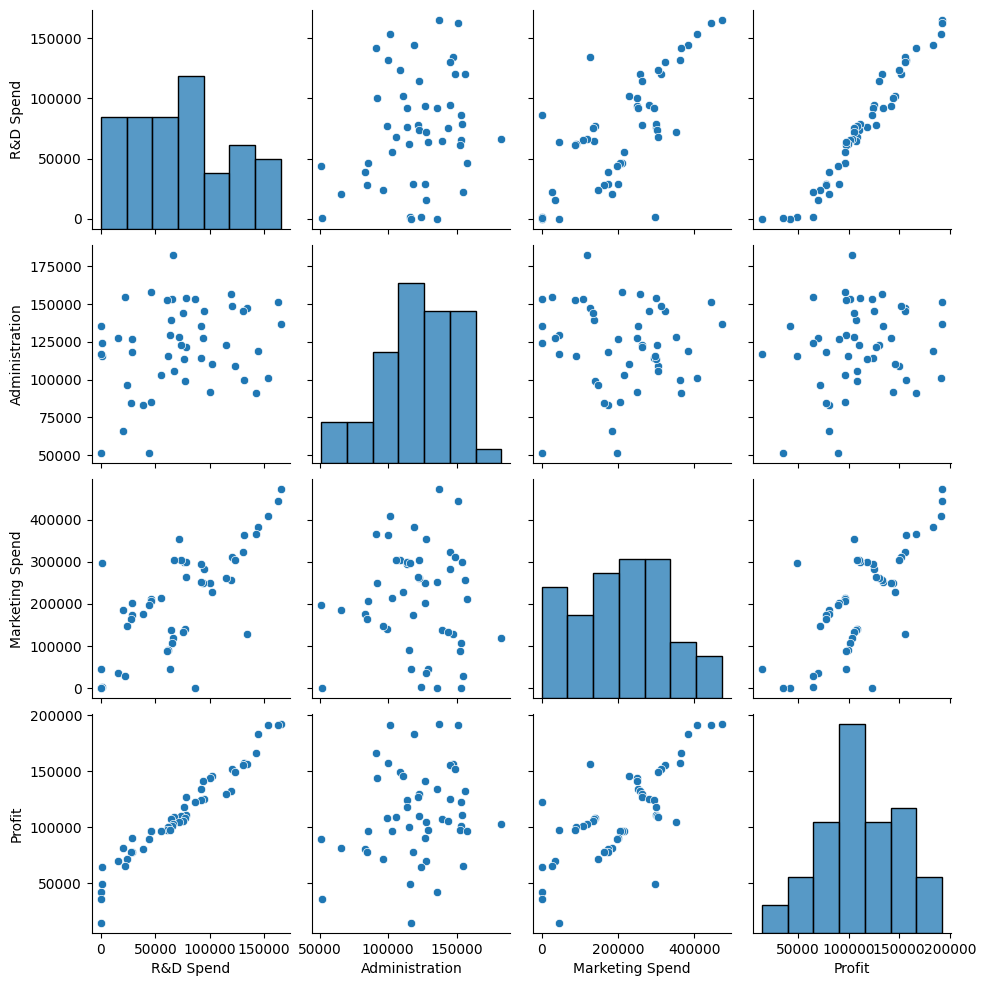

In [7]:
sns.pairplot(df)

## dependent and indepemdent veriable

In [8]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']


## train test 

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## standerdization


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Regression

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(n_jobs=-1)
reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


## prediction of exiting data 

In [12]:
y_pred = reg.predict(X_test)

## chack the model is good or bed 
### if r2_score is near to 1 then it is good

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
print(r2_score(y_test,y_pred))

86644383.23852435
7432.785584598919
9308.296473497412
0.9193827032400599


## pradution for new data

In [14]:
reg.predict(sc.transform(np.array([[165349.2,136897.8,471784.1]])))

/Users/apple/AI_ML/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([192350.35263695])